In [1]:
%matplotlib inline

import os

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation

from IPython.display import HTML
from IPython import display

In [3]:
graphs = []
log_path = "/home/datta/lab/Rethinking-Binarized-Neural-Network-Optimization/logs/theorem_cifar_logs/"
for file in os.listdir(log_path):
    df = pd.read_json(log_path+file)
    df = df[[1, 2]]
    df['label'] = file.split(".json")[0]
    graphs.append(df)

In [12]:
def best_acc(df):
    return df[2].max()
sorted_graphs = sorted(graphs, key = best_acc, reverse=True)
colors = ["#1f77b4","#ff7f0e","#2ca02c", "#9467bd", "#d62728"]

run-exper_ra_Ad_0.01_False_train-tag-epoch_accuracy (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
run-exper_gl_SG_1.0_False_train-tag-epoch_accuracy (1.0, 0.4980392156862745, 0.054901960784313725, 1.0)
run-exper_gl_SG_0.01_True_train-tag-epoch_accuracy (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)
run-exper_ra_SG_0.01_False_train-tag-epoch_accuracy (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0)
run-exper_gl_SG_0.01_False_train-tag-epoch_accuracy (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0)


"\n_ = ax.legend(['Adam init=random lr=0.01', 'SGD init=glorot lr=1',\n               'SGD init=glorot lr=0.01', 'SGD init=glorot lr=0.01 scaled weights', 'SGD init=random lr=0.01'], loc=4)\n"

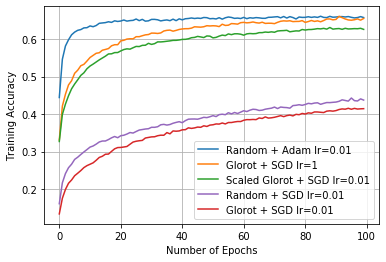

In [14]:
%matplotlib inline
fig, ax = plt.subplots(1, 1)
_ = plt.rcParams['figure.figsize'] = (15, 5)

for i, df in enumerate(sorted_graphs):
    plot = ax.plot(df[1], df[2], colors[i])
    # To make sure color is similar to mnist
    print(df['label'][0], plot[0].get_color())
    # Focus on the trends that matter
    # _ = plt.ylim(0.8, 1)

_ = plt.xlabel("Number of Epochs")
_ = plt.ylabel("Training Accuracy")
_ = plt.grid(True)
_ = ax.legend(['Random + Adam lr=0.01', 'Glorot + SGD lr=1', 'Scaled Glorot + SGD lr=0.01', 'Random + SGD lr=0.01', 'Glorot + SGD lr=0.01'], loc=4)

"""
_ = ax.legend(['Adam init=random lr=0.01', 'SGD init=glorot lr=1',
               'SGD init=glorot lr=0.01', 'SGD init=glorot lr=0.01 scaled weights', 'SGD init=random lr=0.01'], loc=4)
"""
#_ = ax.legend(legend, loc = 4)

In [15]:
fig.savefig("theorem_cifar.png")